## Assignment 7 - Deadline: Dec 17, 2024, Tue 11pm

#### DSAI 510 Fall 2024

Complete the assignment below and upload <span style="color:red">both the .ipynb file and its pdf</span> to https://moodle.boun.edu.tr by the deadline given above. The submission page on Moodle will close automatically after this date and time.


To make a pdf, this may work: Hit CMD+P or CTRL+P, and save it as PDF. You may also use other options from the File menu.

In [4]:
# Run this cell first

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set the display option to show all rows scrolling with a slider
pd.set_option('display.max_rows', None)
# To disable this, run the line below:
# pd.reset_option('display.max_rows')

## Note: 
In the problems below, if they ask "show the number of records that are nonzero", 
the answer is a number; so you don't need to show the records themselves.
But if it asks, "show the records with NaN", it wants you to print those records (rows)
containing NAN and other entries, not asking how many such records there are. So be careful about what you're asked.

## Problem 1: Age IQ Wealth dataset (30 pts)

Here we'll use PCA to reduce the dimension of the data.

1) Load the age-iq-wealth dataset and apply standardization to the numerical columns. Standardization is needed before applying PCA.
2) Apply PCA by using the function `PCA()` from `sklearn.preprocessing` and call the output `principalComponents`. The `principalComponents` matrix should have the same dimensions as the original matrix (excluding the "Name" column).
3) Round `principalComponents` to 3 decimal points. Any column came out all zeros?
4) Use `explained_variance_ratio_` attribute of the `PCA()` class to calculate the proportion of variance explained by each principal component. The principal coordinates (columns of `principalComponents` matrix) with associated high variance correspond to important ones. The ones with **relatively** low variance can be eliminated. Which unimportant principal coordinate or coordinates would you eliminate based on the three variances you get?
5) Now redo PCA but this time enforce that it produces only two principal components by using `pca = PCA(n_components=2)`, i.e., doing PCA and dimensional reduction in one step.
6) The two principal components are related to the original coordinates (features) through PC1 = a Age + b IQ + c Weight and PC2 = d Age + e IQ + f Weight where a,b,c,d,e and f are called "loadings". Find the loadings by using `components_` attribute of `PCA()` and create a table as below

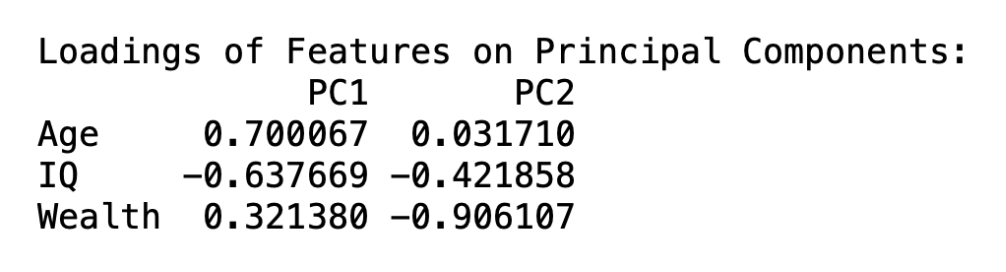

7) Use the loadings calculated in the previous step and show **algebraically** that by using Age, IQ and Weight, you can find the PC1 value for Ali. Show your calculation. (Ali, or any record, is at the same row both in the original data matrix and the PCA transformed one.) 
8) Make a 2D scatterplot of the PCA transformed with coordinates PC1 and PC2. Do you see any clusters in the reduced 2D space? If yes, how many clusters do you see?


In [5]:
#Part 1
df = pd.read_csv("C:/Users/seval/OneDrive/Desktop/BOUN2024/DSAI510/HW7/age-iq-wealth.csv")

print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Statistical summary of numerical columns
print("\nDescriptive statistics of original data:")
print(df[['Age', 'IQ', 'Wealth']].describe())

First few rows of the dataset:
       Name  Age  IQ  Wealth
0  Xiaoping   67  66     533
1       Yun   69  60     525
2  Florence   75  70     585
3     Norma   57  67     486
4   Mohamad   55  63     464

Missing values in each column:
Name      0
Age       0
IQ        0
Wealth    0
dtype: int64

Descriptive statistics of original data:
             Age          IQ      Wealth
count  50.000000   50.000000   50.000000
mean   48.860000   92.840000  522.820000
std    18.620824   28.039593   35.905028
min    20.000000   60.000000  448.000000
25%    35.000000   66.000000  491.500000
50%    47.000000   90.000000  530.000000
75%    67.000000  120.000000  549.500000
max    79.000000  130.000000  587.000000


In [6]:
# Part 1(continued)
from sklearn.preprocessing import StandardScaler

# Get numerical features
features = df[['Age', 'IQ', 'Wealth']]

# Standardize each column
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Verify standardization
print("\nVerifying standardization:")
print("\nMeans (should be close to 0):")
print(features_scaled.mean())
print("\nStandard deviations (should be close to 1):")
print(features_scaled.std())


Verifying standardization:

Means (should be close to 0):
-4.973799150320702e-16

Standard deviations (should be close to 1):
0.9999999999999998


In [7]:
# Part 2
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(features_scaled)

# Show the shape of the output
print("Shape of original data (excluding Name):", features_scaled.shape)
print("Shape of principalComponents:", principalComponents.shape)

Shape of original data (excluding Name): (50, 3)
Shape of principalComponents: (50, 3)


In [9]:
# Part 3
principalComponents_rounded = np.round(principalComponents, 3)
print("\nPrincipal Components (rounded to 3 decimal points):")
print(principalComponents_rounded)


Principal Components (rounded to 3 decimal points):
[[ 1.398  0.18   0.   ]
 [ 1.539  0.478  0.   ]
 [ 2.08  -1.193  0.   ]
 [ 0.57   1.345  0.   ]
 [ 0.387  1.964 -0.   ]
 [ 1.805 -0.266  0.   ]
 [ 2.159 -1.227 -0.   ]
 [ 1.373  0.73   0.   ]
 [ 0.482  1.563  0.   ]
 [ 0.645  1.403  0.   ]
 [ 0.582  1.07  -0.   ]
 [ 1.66  -0.473  0.   ]
 [ 2.371 -0.779  0.   ]
 [ 1.485 -0.038 -0.   ]
 [ 1.323  0.122 -0.   ]
 [ 0.732  1.186  0.   ]
 [ 0.957  1.358  0.   ]
 [ 1.805 -0.266  0.   ]
 [ 1.223  0.614  0.   ]
 [ 2.08  -1.193  0.   ]
 [ 1.876 -0.116  0.   ]
 [ 0.653  1.22   0.   ]
 [ 0.553  1.712  0.   ]
 [ 1.739 -0.507  0.   ]
 [ 1.576 -0.347  0.   ]
 [-1.331  0.547  0.   ]
 [-1.024 -1.114  0.   ]
 [-1.036 -0.839  0.   ]
 [-0.969 -0.598  0.   ]
 [-2.305  1.506 -0.   ]
 [-0.924 -1.606  0.   ]
 [-0.774 -1.491  0.   ]
 [-1.048 -0.564  0.   ]
 [-2.138  1.254  0.   ]
 [-2.192  0.738  0.   ]
 [-1.976  1.094  0.   ]
 [-1.868  0.419  0.   ]
 [-1.252 -1.195  0.   ]
 [-0.874 -0.999 -0.   ]
 [-1.934  0

In [ ]:
# Here 3rd column meaning Wealth came all zero

In [10]:
# Part 4
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio for each component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.3f}")


Explained Variance Ratio for each component:
PC1: 0.679
PC2: 0.321
PC3: 0.000


In [ ]:
# We can eliminate PC3 since it is all zero

In [11]:
# Part 5
pca_2 = PCA(n_components=2)
principalComponents_2d = pca_2.fit_transform(features_scaled)

In [12]:
# Part 6
loadings = pd.DataFrame(
    pca_2.components_, 
    columns=features.columns,
    index=['PC1', 'PC2']
)

# Transpose the loadings to match the image format
loadings_formatted = loadings.T  # This puts features as rows and PCs as columns

print("Loadings of Features on Principal Components:")
print(loadings_formatted)


Loadings of Features on Principal Components:
             PC1       PC2
Age     0.700067  0.031710
IQ     -0.637669 -0.421858
Wealth  0.321380 -0.906107


In [13]:
# Part 7

# Find Ali's values
print("Ali's original values:")
ali_data = df[df['Name'] == 'Ali'][['Age', 'IQ', 'Wealth']]
print(ali_data)

# Standardize Ali's values using the same scaler
ali_standardized = scaler.transform(ali_data)
print("\nAli's standardized values:")
ali_standardized_df = pd.DataFrame(ali_standardized, columns=['Age', 'IQ', 'Wealth'])
print(ali_standardized_df)

# Show the loadings from previous step
print("\nLoadings for PC1:")
for column in features.columns:
    loading = loadings_formatted.loc[column, 'PC1']
    print(f"{column}: {loading:.6f}")

# Calculate Ali's PC1 algebraically
print("\nCalculating PC1 for Ali:")
pc1_value = 0
for i, column in enumerate(features.columns):
    std_value = ali_standardized[0][i]
    loading = loadings_formatted.loc[column, 'PC1']
    contribution = std_value * loading
    print(f"{column}: {std_value:.6f} × {loading:.6f} = {contribution:.6f}")
    pc1_value += contribution

print(f"\nAli's PC1 value = {pc1_value:.6f}")

# Verify with PCA result
ali_index = df[df['Name'] == 'Ali'].index[0]
actual_pc1 = principalComponents[ali_index, 0]
print(f"Actual PC1 from PCA transformation: {actual_pc1:.6f}")

Ali's original values:
   Age  IQ  Wealth
8   56  66     478

Ali's standardized values:
        Age        IQ    Wealth
0  0.387335 -0.966936 -1.260966

Loadings for PC1:
Age: 0.700067
IQ: -0.637669
Wealth: 0.321380

Calculating PC1 for Ali:
Age: 0.387335 × 0.700067 = 0.271160
IQ: -0.966936 × -0.637669 = 0.616585
Wealth: -1.260966 × 0.321380 = -0.405250

Ali's PC1 value = 0.482495
Actual PC1 from PCA transformation: 0.482495


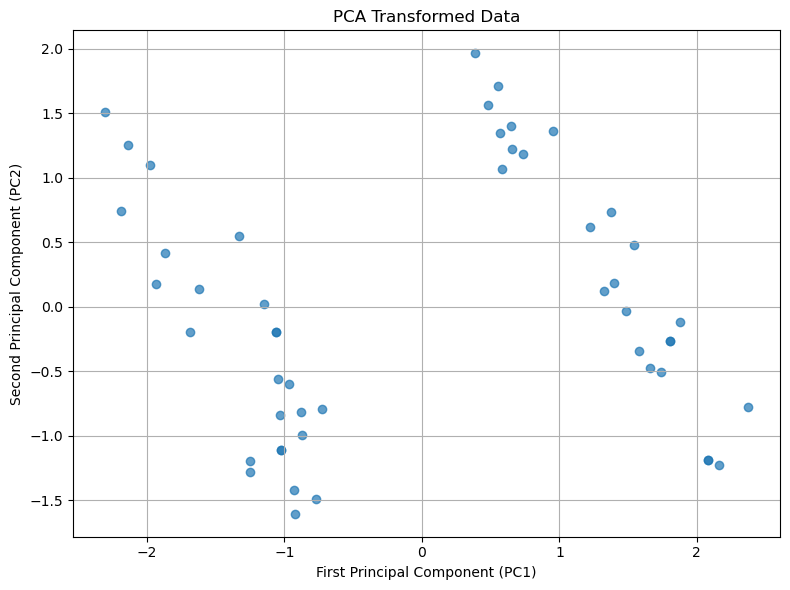

In [14]:
# Part 8
plt.figure(figsize=(8, 6))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], alpha=0.7)
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.title('PCA Transformed Data')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# 2 clusters are observed> 
# One cluster in the left side (around PC1 = -2 to -1) 
# One cluster in the right side (around PC1 = 1 to 2)

## Problem 2: Clustering disk & circle dataset (20 pts)

We've used neural networks in the class to cluster the disk and circle dataset given below. Now use another algorithm of your choice that would cluster the outer circle and inner disk correctly. Do not use neural networks; you're free to use any other clustering algorithm. Generate scatter plot by coloring each cluster in a different color.

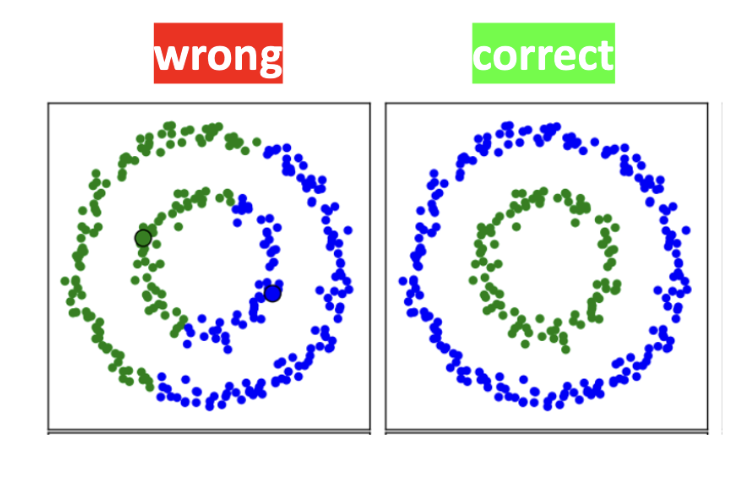

In [15]:
dfcirc = pd.read_csv("C:/Users/seval/OneDrive/Desktop/BOUN2024/DSAI510/HW7/disk-and-circle.csv")
dfcirc.head()

,feature1,feature2
0,-9.049800,-3.762775
1,1.882356,-0.032469
2,-5.818836,6.980322
3,-1.844639,4.959437
4,6.903243,-6.721458


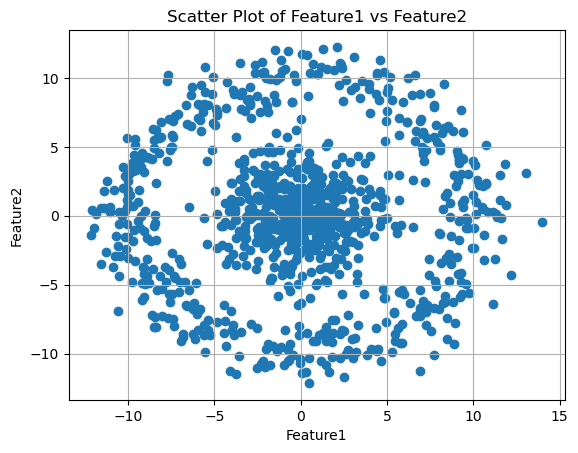

In [16]:
plt.scatter(dfcirc['feature1'], dfcirc['feature2'])

# Adding labels and title
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Scatter Plot of Feature1 vs Feature2')

# Showing the plot
plt.grid(True)
plt.show()

C:\Users\seval\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


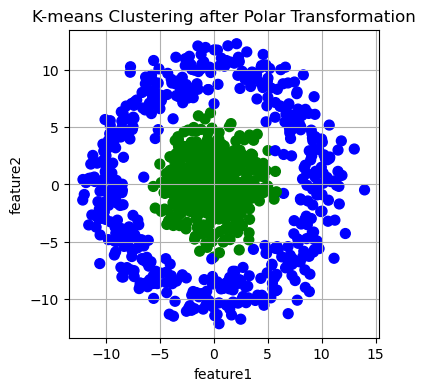

In [40]:
from sklearn.cluster import KMeans

# Convert to polar coordinates
# Calculate radius (r) and angle (theta)
r = np.sqrt(dfcirc['feature1']**2 + dfcirc['feature2']**2)
theta = np.arctan2(dfcirc['feature2'], dfcirc['feature1'])

# Create DataFrame with polar coordinates
polar_df = pd.DataFrame({
    'radius': r,
    'theta': theta
})

# Apply k-means on radius only (since that's what separates the circles)
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
labels = kmeans.fit_predict(r.values.reshape(-1, 1))

# Plot original data with new clusters
plt.figure(figsize=(4, 4))
colors = ['green', 'blue']  # Define specific colors for each cluster
plt.scatter(dfcirc['feature1'], dfcirc['feature2'], 
           c=[colors[label] for label in labels],  # Use our defined colors
           s=50)

plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('K-means Clustering after Polar Transformation')
plt.grid(True)
plt.show()


## Problem 3: Clustering on data from Kaggle (20 pts)

Go to [kaggle.com](kaggle.com). 

(a) Find a dataset that is related to your professional field or the field you're interested in by using the search bar at the very top of the page. Add the link of the data in this notebook.

(b) Use a clustering algorithm of your choice to cluster that data. Generate scatter plot by coloring each cluster in a different color. (Do not copy the code on Kaggle exactly, modify it, make it yours.)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Link > https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

df = pd.read_csv("C:/Users/seval/OneDrive/Desktop/BOUN2024/DSAI510/HW7/diabetes_prediction_dataset.csv")

print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


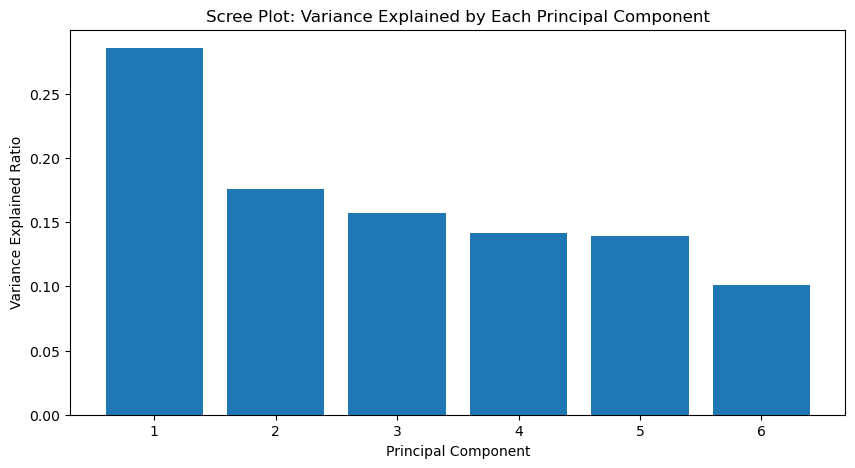

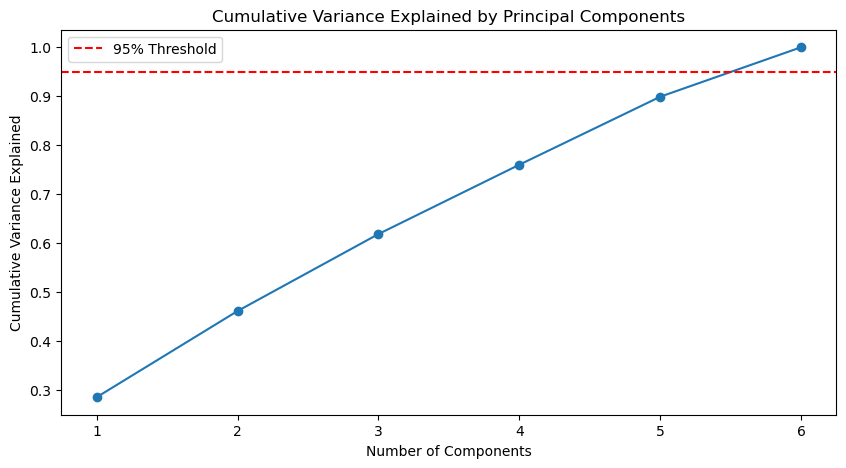

Number of components explaining 95% variance: 6

Variance explained by each component:
PC1: 28.55%
PC2: 17.59%
PC3: 15.72%
PC4: 14.15%
PC5: 13.88%
PC6: 10.10%

Cumulative variance explained:
First 1 components: 28.55%
First 2 components: 46.15%
First 3 components: 61.86%
First 4 components: 76.02%
First 5 components: 89.90%
First 6 components: 100.00%


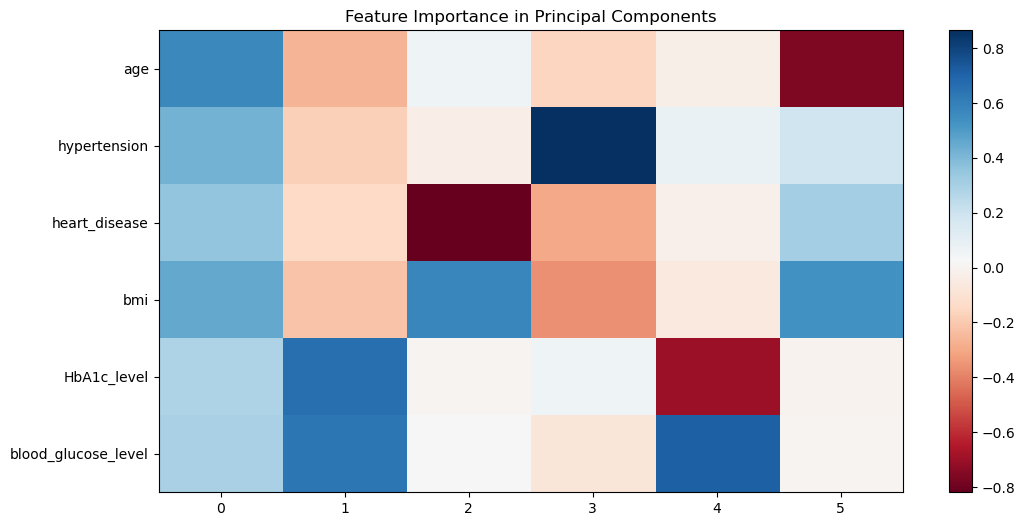

In [5]:
# Define numerical columns
numerical_cols = ['age', 'hypertension', 'heart_disease', 
                 'bmi', 'HbA1c_level', 'blood_glucose_level']

def perform_pca_analysis(df, numerical_cols):
    # Standardize the numerical data
    scaler = StandardScaler()
    sd_data = scaler.fit_transform(df[numerical_cols])
    
    # Initial PCA without limiting components
    pca = PCA()
    pca.fit(sd_data)
    
    # Create scree plot
    plt.figure(figsize=(10, 5))
    plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
            pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained Ratio')
    plt.title('Scree Plot: Variance Explained by Each Principal Component')
    plt.show()
    
    # Plot cumulative variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(cumulative_variance) + 1), 
             cumulative_variance, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.title('Cumulative Variance Explained by Principal Components')
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
    plt.legend()
    plt.show()
    
    # Determine optimal number of components
    n_components = np.argmax(cumulative_variance >= 0.95) + 1
    print(f"Number of components explaining 95% variance: {n_components}")
    
    # Perform final PCA with optimal components
    pca_final = PCA(n_components=n_components)
    pca_result = pca_final.fit_transform(sd_data)
    
    # Create DataFrame with PCA results
    pca_df = pd.DataFrame(data=pca_result, 
                         columns=[f'PC{i+1}' for i in range(n_components)])
    
    # Print variance explained
    print("\nVariance explained by each component:")
    for i, var in enumerate(pca_final.explained_variance_ratio_, 1):
        print(f"PC{i}: {var*100:.2f}%")
    
    print("\nCumulative variance explained:")
    cumulative = np.cumsum(pca_final.explained_variance_ratio_)
    for i, cum_var in enumerate(cumulative, 1):
        print(f"First {i} components: {cum_var*100:.2f}%")
    
    # Create feature importance plot
    plt.figure(figsize=(12, 6))
    components = pd.DataFrame(
        pca_final.components_.T,
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=numerical_cols
    )
    
    plt.imshow(components, cmap='RdBu', aspect='auto')
    plt.colorbar()
    plt.xticks(range(n_components))
    plt.yticks(range(len(numerical_cols)), numerical_cols)
    plt.title('Feature Importance in Principal Components')
    plt.show()
    
    return pca_df, sd_data, pca_final

# Run the analysis
pca_df, sd_data, pca_final = perform_pca_analysis(df, numerical_cols)

In [ ]:
# here we see that PCA cannot help us much to see clusters better via feature transformation because:
# The variance is quite spread out across components (no single component dominates)
# The first two components only explain about 46% of total variance
# we need min 5 components too see 90% variance, and still 10% might be a big loss
# Blood glucose level and HbA1c_level show strong correlations (dark blue/red patterns)
# BMI has consistent moderate influence across components (medium blue values)
# Age has strong influence in both first and last components
# Hypertension and heart disease show moderate influence
# so lets proceed with k-means and TSNE

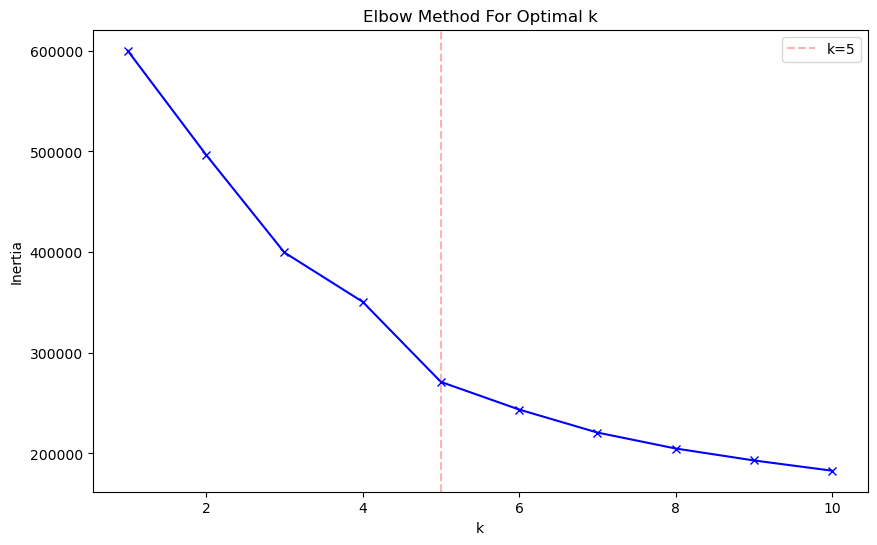


Change in inertia between consecutive k values:
k=2 to k=3: 97041.98
k=3 to k=4: 48988.22
k=4 to k=5: 79611.96
k=5 to k=6: 27448.92
k=6 to k=7: 22862.66
k=7 to k=8: 15841.03
k=8 to k=9: 11861.86
k=9 to k=10: 10194.98


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Select numerical columns
numerical_cols = ['age', 'hypertension', 'heart_disease', 
                  'bmi', 'HbA1c_level', 'blood_glucose_level']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Calculate elbow curve
inertias = []
K = range(1, 11)  # Testing k from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.axvline(x=5, color='r', linestyle='--', alpha=0.3, label='k=5')
plt.legend()
plt.show()

# Print the change in inertia
print("\nChange in inertia between consecutive k values:")
for i in range(1, len(inertias)-1):
    change = inertias[i] - inertias[i+1]
    print(f"k={i+1} to k={i+2}: {change:.2f}")



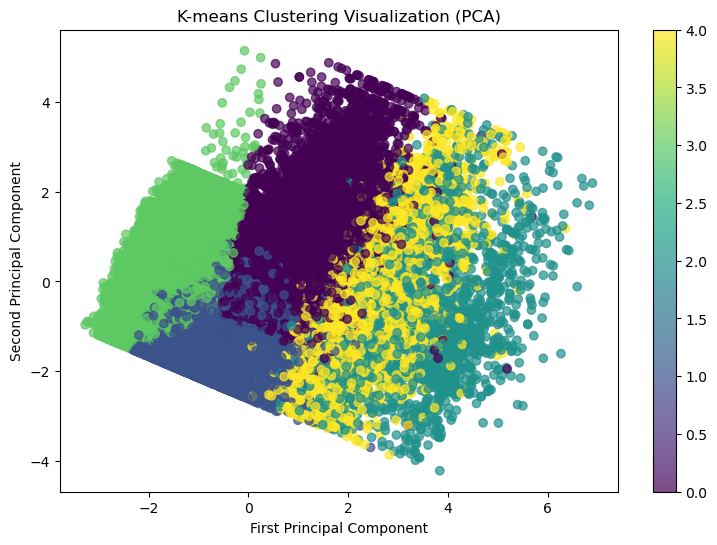


Cluster Characteristics:

Cluster 0:
age                     53.361410
hypertension             0.000000
heart_disease            0.000000
bmi                     29.972520
HbA1c_level              6.242878
blood_glucose_level    145.650104
dtype: float64
Diabetes Prevalence: 15.30%
Cluster Size: 34999

Cluster 1:
age                     45.727808
hypertension             0.000000
heart_disease            0.000000
bmi                     28.432705
HbA1c_level              4.281079
blood_glucose_level    132.533315
dtype: float64
Diabetes Prevalence: 0.00%
Cluster Size: 25829

Cluster 2:
age                     67.823440
hypertension             0.232369
heart_disease            1.000000
bmi                     29.325700
HbA1c_level              5.884729
blood_glucose_level    152.137747
dtype: float64
Diabetes Prevalence: 32.14%
Cluster Size: 3942

Cluster 3:
age                     16.524128
hypertension             0.000000
heart_disease            0.000000
bmi                     2

In [9]:
# Run K-means with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Visualize clusters in PCA space
plt.figure(figsize=(9, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                      c=clusters, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('K-means Clustering Visualization (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Add cluster labels to original dataframe
df['Cluster'] = clusters

# Cluster characteristics
print("\nCluster Characteristics:")
for i in range(4):
    cluster_data = df[df['Cluster'] == i]
    print(f"\nCluster {i}:")
    print(cluster_data[numerical_cols].mean())
    print(f"Diabetes Prevalence: {cluster_data['diabetes'].mean()*100:.2f}%")
    print(f"Cluster Size: {len(cluster_data)}")



In [ ]:
# The PCA visualization shows NO really distict separation 
# PCA 1 and 2 components we know that they do not represent enough variance.
# overall clustering is not good with these algorithms.
# further feature engineering and domain knowledge needed.
